## Analysis of appointed positions in Santos

This notebook explores the appointed positions from the city of Santos and calculates a few indicators, such as:
* Percentage of appointed positions compared to the total number of positions in municipality
* Number of appointed employees who share a last name with the mayor
* Number of appointed employees who share a last name with the secretary of his/her department

In [1]:
# importing libraries
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
FILEPATHS = { # For october only
    'comissionados_nao_quadro':'comissionados_nao_quadro_out.xls',
    'comissionados_quadro':'comissionados_quadro_out.xls',
    'folha_pgto_oct':'folha_pgto_out.xls',
    'media_salario':'media_salario_out.xls',
    'servants': 'servidores_out.xls'
}
def get_filepath(key):
    return FILEPATHS[key]

In [4]:
# reading files
servidores = pd.read_excel('../data/{}'.format(get_filepath('servants'))).dropna()
comissionados_nao_quadro = pd.read_excel('../data/{}'.format(get_filepath('comissionados_nao_quadro'))).dropna()
comissionados_quadro = pd.read_excel('../data/{}'.format(get_filepath('comissionados_quadro'))).dropna()

In [5]:
comissionados_nao_quadro.shape

(196, 6)

In [6]:
comissionados_quadro.head()

,Secretaria,Departamento,Registro,Nome,Cargo Efetivo,Nível Efetivo,Nível Salarial,Cargo Atual
1,SEFIN,DEATRI,08.061-4,DINA ELIZABETH EVANGELISTA SANTOS,AUDITOR FISCAL DE TRIBUTOS MUNICIPAIS,R,R,COORDENADOR II
2,SMS,SMS,12.040-2,VALTER MAKOTO NAKAGAWA,MEDICO,S,S,SECRETARIO ADJUNTO
3,OTC,OTC,14.425-3,RIVALDO SANTOS DE ALMEIDA JUNIOR,TEC.DE ABASTECIMENTO,L,CS,OUVIDOR PUBLICO MUNICIPAL
4,SESEG,CORREGE-SESEG,15.068-0,RAIMUNDO DOS SANTOS FERREIRA,GUARDA MUNICIPAL IV-INSPETOR CHEFE,L,C-1,CHEFE DE DEPARTAMENTO
5,SESEG,DGM,15.193-6,FRANCISCO APARECIDO JERONIMO,GUARDA MUNICIPAL III-INSPETOR,J,J,COORDENADOR III


In [7]:
servidores['Tipo de Servidor'].unique()

array(['Estatutário', 'Cargo em Comissão não Pertencente ao Quadro',
       'Celetista'], dtype=object)

In [8]:
servidores.head()

,Nome do Servidor,Registro,Tipo de Servidor,Cargo Efetivo,Cargo,Carga Horária,Lotação,Admissão,Qtde.
1,ABDON FERREIRA DA SILVA NETO,32.642-1,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SEDUC - UME-NGF,20/05/2013,1
2,ABIGAIL DE ALMEIDA ELIAS,28.796-1,Estatutário,PROF. ADJUNTO I,PROF. ADJUNTO I,105.0,SEDUC - UME-PA,16/10/2009,1
3,ABNER DE SOUZA SANTANA,36.136-0,Estatutário,INSTRUTOR DE ED. MUSICAL,INSTRUTOR DE ED. MUSICAL,200.0,SECULT - COFORM-SECULT,24/04/2018,1
4,ABNER NUNES,31.636-4,Estatutário,OFICIAL DE ADMINISTRACAO,OFICIAL DE ADMINISTRACAO,200.0,SMS - SEUB-ACP,30/10/2012,1
5,ABRAAO COSME SAMPAIO,15.879-0,Estatutário,FISCAL DE TRANSITO,FISCAL DE TRANSITO,200.0,SEFIN - SEFIS-FEI,18/12/1987,1


In [9]:
servidores.columns

Index(['Nome do Servidor', 'Registro', 'Tipo de Servidor', 'Cargo Efetivo',
       'Cargo', 'Carga Horária', 'Lotação', 'Admissão', 'Qtde.'],
      dtype='object')

In [10]:
servidores['Tipo de Servidor'].value_counts()

Estatutário                                    11410
Cargo em Comissão não Pertencente ao Quadro      196
Celetista                                         98
Name: Tipo de Servidor, dtype: int64

In [12]:
comissionados_quadro.shape

(110, 8)

In [10]:
nao_quadro_percentage = len(servidores[\
    servidores['Tipo de Servidor']=='Cargo em Comissão não Pertencente ao Quadro'])\
    /len(servidores)

In [11]:
print ('KPI1 : {:.2f}% of servants comissionados over all servantes'.format(100.*nao_quadro_percentage))

KPI1 : 1.67% of servants comissionados over all servantes


In [15]:
perc_comissionados = len(comissionados_quadro)/len(servidores)
print ('Numero de comissionados: {:.2f}%'.format(perc_comissionados*100))

Numero de comissionados: 0.94%


In [34]:
# Breakdown by dept
servidores['nao_quadro'] = servidores.apply(lambda x: 1 if x['Tipo de Servidor']=='Cargo em Comissão não Pertencente ao Quadro' else 0,axis=1)
grouped = servidores.groupby(['Lotação'],as_index=False).\
agg({'Registro':'count','nao_quadro':'sum'}).sort_values(by='Registro',ascending=False)

In [35]:
servidores.head()

,Nome do Servidor,Registro,Tipo de Servidor,Cargo Efetivo,Cargo,Carga Horária,Lotação,Admissão,Qtde.,nao_quadro
1,ABDON FERREIRA DA SILVA NETO,32.642-1,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SEDUC - UME-NGF,20/05/2013,1,0
2,ABIGAIL DE ALMEIDA ELIAS,28.796-1,Estatutário,PROF. ADJUNTO I,PROF. ADJUNTO I,105.0,SEDUC - UME-PA,16/10/2009,1,0
3,ABNER DE SOUZA SANTANA,36.136-0,Estatutário,INSTRUTOR DE ED. MUSICAL,INSTRUTOR DE ED. MUSICAL,200.0,SECULT - COFORM-SECULT,24/04/2018,1,0
4,ABNER NUNES,31.636-4,Estatutário,OFICIAL DE ADMINISTRACAO,OFICIAL DE ADMINISTRACAO,200.0,SMS - SEUB-ACP,30/10/2012,1,0
5,ABRAAO COSME SAMPAIO,15.879-0,Estatutário,FISCAL DE TRANSITO,FISCAL DE TRANSITO,200.0,SEFIN - SEFIS-FEI,18/12/1987,1,0


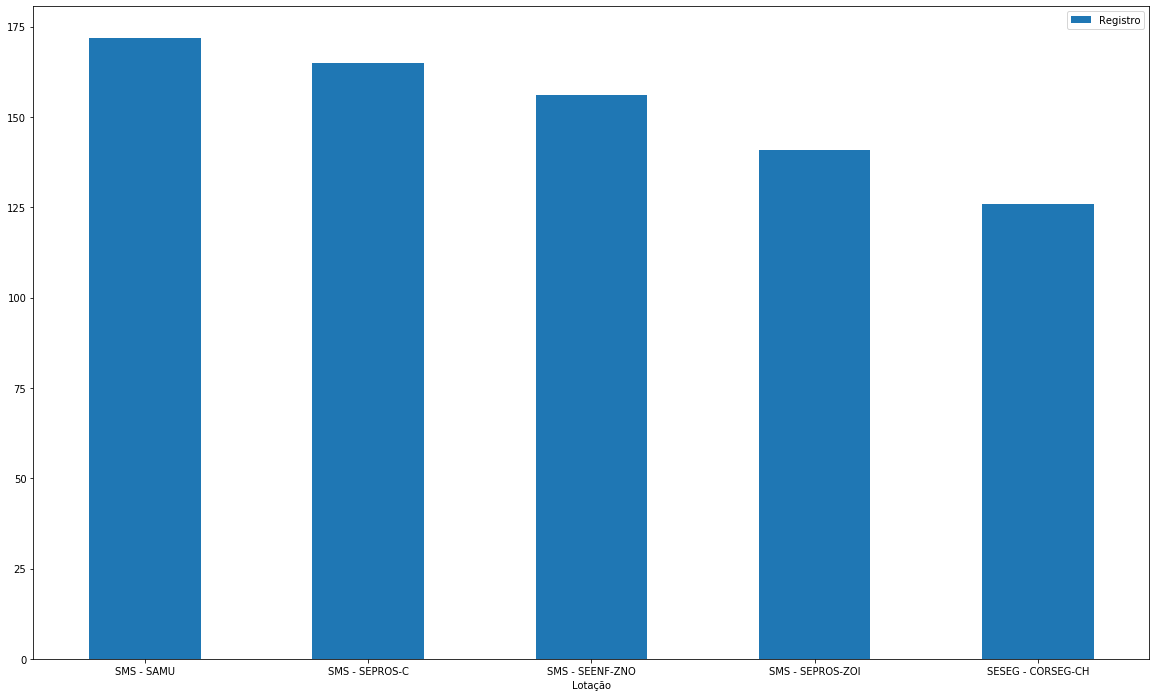

In [36]:
grouped[:5].plot.bar(x='Lotação', y='Registro', rot=0, figsize=(20,12))

In [42]:
grouped['perc'] = grouped['nao_quadro']/grouped['Registro']
grouped.sort_values('nao_quadro',ascending=False)

,Lotação,Registro,nao_quadro,perc
4,GPM - GPM,51,20,0.392157
468,SEGOV - GAB-SEGOV,35,11,0.314286
582,SESERP - GAB-SESERP,27,10,0.370370
85,SECULT - GAB-SECULT,20,7,0.350000
699,SMS - GAB-SMS,45,7,0.155556
...,...,...,...,...
107,SECULT - SEHE,5,0,0.000000
680,SMS - COMLIC-SMS,5,0,0.000000
763,SMS - SEUB-GON,45,0,0.000000
514,SEMAM - UNIBOT-ORQ,5,0,0.000000


### KPI 2 - Mayor

In [33]:
prefeito = servidores[servidores['Cargo Efetivo'].str.contains('PREFEITO MUNICIPAL')].iloc[0]['Nome do Servidor']

In [34]:
prefeito

'PAULO ALEXANDRE PEREIRA BARBOSA'

In [35]:
surnames_mayor = ['PEREIRA','BARBOSA']

In [36]:
# Comissionados fora quadro with same last name (any) as mayor
nao_quadro_same_surname = comissionados_nao_quadro[comissionados_nao_quadro.Nome.str.contains('|'.join(surnames_mayor))]
print (nao_quadro_same_surname.shape)
nao_quadro_same_surname.head()

(6, 6)


,Secretaria,Departamento,Registro,Nome,Cargo Efetivo,Nível Salarial
28,SECOM,SECOM,36.742-5,CAMILLA PEREIRA COSTA,ASSESSOR TECNICO III,C-3
73,SESERP,DESERP,34.475-4,FLAVIO ANIBAL PEREIRA MORGADO,COORDENADOR II,C-2
128,SECULT,DECITEC,35.051-2,MICHEL AUGUSTO PEREIRA,COORDENADOR III,C-3
140,GPM,GPM,34.954-8,PAULO ALEXANDRE PEREIRA BARBOSA,PREFEITO MUNICIPAL,PREF
168,SEGOV,SEGOV,31.849-3,ROGERIO PEREIRA DOS SANTOS,SECRETARIO MUNICIPAL,CS


In [37]:
print ('KPI 2: {0} servants with same last name as mayor - {1}'.format(len(nao_quadro_same_surname),
       str(surnames_mayor)))
print ('total comissionados nao quadro: {}'.format(len(comissionados_nao_quadro)))

KPI 2: 6 servants with same last name as mayor - ['PEREIRA', 'BARBOSA']
total comissionados nao quadro: 196


### KPI3 - same surname as secretary of his/her department

In [40]:
secreatarios = servidores[servidores['Cargo'].str.contains('SECRETARIO MUNICIPAL')]

In [41]:
secreatarios.head(20)

,Nome do Servidor,Registro,Tipo de Servidor,Cargo Efetivo,Cargo,Carga Horária,Lotação,Admissão,Qtde.
1254,ANGELO JOSE DA COSTA FILHO,31.854-3,Cargo em Comissão não Pertencente ao Quadro,SECRETARIO MUNICIPAL,SECRETARIO MUNICIPAL,200.0,SIEDI - GAB-SIEDI,01/01/2013,1
1736,CARLOS ALBERTO FERREIRA MOTA,31.884-0,Cargo em Comissão não Pertencente ao Quadro,SECRETARIO MUNICIPAL,SECRETARIO MUNICIPAL,200.0,SEDS - GAB-SEDS,03/01/2013,1
1835,CARLOS TEIXEIRA FILHO,34.947-2,Cargo em Comissão não Pertencente ao Quadro,SECRETARIO MUNICIPAL,SECRETARIO MUNICIPAL,200.0,SEGES - GAB-SEGES,02/01/2017,1
2448,CRISTINA ABREU DA ROCHA BARLETTA,20.853-8,Estatutário,PROF. ED. BASICA II,SECRETARIO MUNICIPAL,200.0,SEDUC - GAB-SEDUC,14/02/1995,1
3736,FABIANA RAMOS GARCIA PIRES,29.019-7,Estatutário,ENGENHEIRO,SECRETARIO MUNICIPAL,200.0,SESERP - GAB-SESERP,15/03/2010,1
3762,FABIO ALEXANDRE FERNANDES FERRAZ,31.852-7,Cargo em Comissão não Pertencente ao Quadro,SECRETARIO MUNICIPAL,SECRETARIO MUNICIPAL,200.0,SMS - GAB-SMS,01/01/2013,1
4120,FLAVIO RAMIREZ JORDAO,34.951-4,Cargo em Comissão não Pertencente ao Quadro,SECRETARIO MUNICIPAL,SECRETARIO MUNICIPAL,200.0,SECOM - GAB-SECOM,01/01/2017,1
4240,GELASIO AYRES FERNANDES JUNIOR,36.592-4,Cargo em Comissão não Pertencente ao Quadro,SECRETARIO MUNICIPAL,SECRETARIO MUNICIPAL,200.0,SEMES - GAB-SEMES,03/01/2019,1
5600,JULIO EDUARDO DOS SANTOS,34.949-8,Cargo em Comissão não Pertencente ao Quadro,SECRETARIO MUNICIPAL,SECRETARIO MUNICIPAL,200.0,SEDURB - GAB-SEDURB,01/01/2017,1
7098,MARCOS OLIVEIRA LIBORIO,34.950-6,Cargo em Comissão não Pertencente ao Quadro,SECRETARIO MUNICIPAL,SECRETARIO MUNICIPAL,200.0,SEMAM - GAB-SEMAM,01/01/2017,1


In [42]:
servs_secretario = servidores.merge(secreatarios[['Lotação','Nome do Servidor']], on='Lotação')

In [43]:
# removed own entries of secretary (secretaries also exist in df servants)
servs_secretario_clean = servs_secretario[~servs_secretario.Registro.isin(secreatarios.Registro.unique())]
servs_secretario_clean = servs_secretario_clean.rename(columns={'Nome do Servidor_y':'secretario'})
servs_secretario_clean = servs_secretario_clean.rename(columns={'Nome do Servidor_x':'servidor'})

In [44]:
def extract_surnames(surname):
    forbidden_last_names = ['DA','DE','DOS']
    return [i for i in str(surname).split(' ')[1:] if i not in forbidden_last_names]
    

suspected_servents_secretary = servs_secretario_clean[servs_secretario_clean.\
                       apply(lambda x: any(name in x['servidor'] for name in extract_surnames(x['secretario'])),\
                             axis=1)]

In [45]:
suspected_servents_secretary['Lotação'].value_counts()

SEGOV - GAB-SEGOV      3
SEDS - GAB-SEDS        2
SEGES - GAB-SEGES      2
SAPIC - GAB-SAPIC      2
SEDUC - GAB-SEDUC      1
SMS - GAB-SMS          1
SEDURB - GAB-SEDURB    1
SESEG - GAB-SESEG      1
SETUR - GAB-SETUR      1
SEMAM - GAB-SEMAM      1
SESERP - GAB-SESERP    1
Name: Lotação, dtype: int64

In [46]:
print ('KPI3 : {} suspect servants with same name as secretary'.format(len(suspected_servents_secretary)))
suspected_servents_secretary.head(20)

KPI3 : 16 suspect servants with same name as secretary


,servidor,Registro,Tipo de Servidor,Cargo Efetivo,Cargo,Carga Horária,Lotação,Admissão,Qtde.,secretario
2,EDUARDO ROCHA DE CASTRO,31.523-4,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SEDURB - GAB-SEDURB,10/10/2012,1,JULIO EDUARDO DOS SANTOS
13,ADELARIO MARTINS DOS REIS FILHO,24.412-9,Estatutário,MOTORISTA,MOTORISTA,200.0,SEGES - GAB-SEGES,26/12/2002,1,CARLOS TEIXEIRA FILHO
46,JUAN MANUEL VILLARNOBO FILHO,34.183-4,Cargo em Comissão não Pertencente ao Quadro,SECRETARIO ADJUNTO,SECRETARIO ADJUNTO,200.0,SEGES - GAB-SEGES,06/05/2015,1,CARLOS TEIXEIRA FILHO
75,CAMILLA CARDOSO,28.154-3,Estatutário,OFICIAL DE ADMINISTRACAO,OFICIAL DE ADMINISTRACAO,200.0,SAPIC - GAB-SAPIC,02/09/2008,1,SANDOVAL DO NASCIMENTO SOARES
77,MARIA JOSE FIGUEIREDO XAVIER DE OLIVEIRA,36.642-7,Cargo em Comissão não Pertencente ao Quadro,ASSESSOR TECNICO III,ASSESSOR TECNICO III,200.0,SAPIC - GAB-SAPIC,26/02/2019,1,SANDOVAL DO NASCIMENTO SOARES
108,GUALBERTO GRACINDO GONCALVES JUNIOR,31.549-9,Estatutário,ASSISTENTE SOCIAL,ASSISTENTE SOCIAL,150.0,SEDS - GAB-SEDS,17/10/2012,1,CARLOS ALBERTO FERREIRA MOTA
111,LUCAS FERNANDES ALBERTO,34.554-6,Estatutário,OPERADOR SOCIAL,OPERADOR SOCIAL,200.0,SEDS - GAB-SEDS,16/08/2016,1,CARLOS ALBERTO FERREIRA MOTA
146,ANTONIO RAMOS DO NASCIMENTO,35.638-6,Cargo em Comissão não Pertencente ao Quadro,ASSESSOR TECNICO III,ASSESSOR TECNICO III,200.0,SESERP - GAB-SESERP,10/10/2017,1,FABIANA RAMOS GARCIA PIRES
174,FLAVIO DE BRITO JUNIOR,32.040-8,Cargo em Comissão não Pertencente ao Quadro,SECRETARIO ADJUNTO,SECRETARIO ADJUNTO,200.0,SESEG - GAB-SESEG,15/01/2013,1,SERGIO DEL BEL JUNIOR
202,CECILIO ANTONIO DA ROCHA MELO,25.828-5,Estatutário,PROF. ED. BASICA II,PROF. ED. BASICA II,180.0,SEDUC - GAB-SEDUC,10/11/2006,1,CRISTINA ABREU DA ROCHA BARLETTA


In [47]:
servs_secretario_clean.to_excel('servidores_secretarios.xlsx')

## Finding bumping by comission

In [20]:
comissionados_quadro[comissionados_quadro['Nome']=='PAULA DE MOURA VILLACA PAIXAO'].head()

,Secretaria,Departamento,Registro,Nome,Cargo Efetivo,Nível Efetivo,Nível Salarial,Cargo Atual


In [50]:
comissionados_quadro.head()

,Secretaria,Departamento,Registro,Nome,Cargo Efetivo,Nível Efetivo,Nível Salarial,Cargo Atual
1,SEFIN,DEATRI,08.061-4,DINA ELIZABETH EVANGELISTA SANTOS,AUDITOR FISCAL DE TRIBUTOS MUNICIPAIS,R,R,COORDENADOR II
2,SMS,SMS,12.040-2,VALTER MAKOTO NAKAGAWA,MEDICO,S,S,SECRETARIO ADJUNTO
3,OTC,OTC,14.425-3,RIVALDO SANTOS DE ALMEIDA JUNIOR,TEC.DE ABASTECIMENTO,L,CS,OUVIDOR PUBLICO MUNICIPAL
4,SESEG,CORREGE-SESEG,15.068-0,RAIMUNDO DOS SANTOS FERREIRA,GUARDA MUNICIPAL IV-INSPETOR CHEFE,L,C-1,CHEFE DE DEPARTAMENTO
5,SESEG,DGM,15.193-6,FRANCISCO APARECIDO JERONIMO,GUARDA MUNICIPAL III-INSPETOR,J,J,COORDENADOR III


## Servidores with multiple positions

In [52]:
servidores['Nome do Servidor'].value_counts()

JOSE CARLOS DOS SANTOS                   5
LUCIANE APARECIDA CAMARGO                3
MARCIA FERREIRA DOS SANTOS               3
CARLOS ALBERTO DOS SANTOS                3
MARILENE DOS SANTOS                      3
                                        ..
ROSANGELA DOS SANTOS LOURENCO            1
ADRIANA MIDORI FERREIRA DAS NEVES OTA    1
ANA PAULA ATANES DE SOUZA BARRETO        1
ARETA DE OLIVEIRA AMOROZO                1
JOSE LUIS SANTOS MATOS                   1
Name: Nome do Servidor, Length: 11345, dtype: int64

In [53]:
servidores[servidores['Nome do Servidor']=='JOSE CARLOS DOS SANTOS']

,Nome do Servidor,Registro,Tipo de Servidor,Cargo Efetivo,Cargo,Carga Horária,Lotação,Admissão,Qtde.,nao_quadro
5253,JOSE CARLOS DOS SANTOS,15.523-4,Estatutário,GUARDA MUNICIPAL IV-INSPETOR CHEFE,GUARDA MUNICIPAL IV-INSPETOR CHEFE,200.0,SESEG - CORSEG-M,07/04/1987,1,0
5254,JOSE CARLOS DOS SANTOS,17.391-4,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SESERP - SEALM-SERP,20/04/1982,1,0
5255,JOSE CARLOS DOS SANTOS,20.236-6,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SESERP - CORTEC-ZOI,17/03/1994,1,0
5256,JOSE CARLOS DOS SANTOS,20.815-7,Estatutário,PROF. ED. BASICA II,PROF. ED. BASICA II,200.0,SEDUC - UME-MF,06/02/1995,1,0
5257,JOSE CARLOS DOS SANTOS,28.037-0,Estatutário,AGENTE DE PORTARIA,AGENTE DE PORTARIA,200.0,SEDUC - SEACON-SEDUC,19/08/2008,1,0


In [57]:
servidores[servidores['Cargo']=='AUXILIAR DE SERV. GERAIS']

,Nome do Servidor,Registro,Tipo de Servidor,Cargo Efetivo,Cargo,Carga Horária,Lotação,Admissão,Qtde.,nao_quadro
1,ABDON FERREIRA DA SILVA NETO,32.642-1,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SEDUC - UME-NGF,20/05/2013,1,0
28,ADELACIO MARQUES DE SOUZA FILHO,14.174-7,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SESERP - CORTEC-AC,24/04/1991,1,0
39,ADELINA VIEIRA DOS ANJOS,33.837-6,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SEGOV - DEARTI,19/11/2014,1,0
45,ADELSON CLEITON FERREIRA,21.294-4,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SMS - SEAGLO-ZNO,22/08/1995,1,0
53,ADEMILSON RODRIGUES MALAMINA,31.391-6,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SESERP - SELETRIC,26/09/2012,1,0
...,...,...,...,...,...,...,...,...,...,...
11641,WILLIAN SANTOS DE LIMA,31.021-9,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SESERP - CORTEC-AC,11/07/2012,1,0
11644,WILLIANS FREDERIC GARCIA FERREIRA,13.999-8,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SESERP - CORTEC-ZOI,11/03/1991,1,0
11657,WILSON DONIZETI DUARTE,31.338-7,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SEGES - SEPATRI-SEGES,21/09/2012,1,0
11685,YGOR RAMON ANTAO SILVA,31.820-4,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SESERP - CORTEC-ZOI,17/12/2012,1,0


# Evolucao comissionados quadro - diferentes positions

In [8]:
comissionados_quadro.head()

,Secretaria,Departamento,Registro,Nome,Cargo Efetivo,Nível Efetivo,Nível Salarial,Cargo Atual
1,SEFIN,DEATRI,08.061-4,DINA ELIZABETH EVANGELISTA SANTOS,AUDITOR FISCAL DE TRIBUTOS MUNICIPAIS,R,R,COORDENADOR II
2,SMS,SMS,12.040-2,VALTER MAKOTO NAKAGAWA,MEDICO,S,S,SECRETARIO ADJUNTO
3,OTC,OTC,14.425-3,RIVALDO SANTOS DE ALMEIDA JUNIOR,TEC.DE ABASTECIMENTO,L,CS,OUVIDOR PUBLICO MUNICIPAL
4,SESEG,CORREGE-SESEG,15.068-0,RAIMUNDO DOS SANTOS FERREIRA,GUARDA MUNICIPAL IV-INSPETOR CHEFE,L,C-1,CHEFE DE DEPARTAMENTO
5,SESEG,DGM,15.193-6,FRANCISCO APARECIDO JERONIMO,GUARDA MUNICIPAL III-INSPETOR,J,J,COORDENADOR III


In [17]:
# olhar media salarial, ver salarios para cada vaga.
# colocar salarios para cada comissionado quadro, para comparar as diferencas em salario
media_salarial = pd.read_excel('../data/media_salarial_out.xls').dropna()

In [18]:
media_salarial.head()

,Cargo,Qtde.,Salário Bruto,Salário Base,Total Líquido,Média Salarial
1,ACOMPANHANTE TERAPEUTICO,39,218423.99,106397.85,164796.62,5600.615128
2,ADMINISTRADOR,3,23903.51,22090.65,16458.00,7967.836667
3,ADVOGADO,10,105761.57,83595.05,72082.98,10576.157000
4,AGENTE ADMINISTRATIVO,92,635130.99,209865.71,428106.48,6903.597717
5,AGENTE ADMINISTRATIVO I,1,4063.14,1275.13,3538.91,4063.140000


In [24]:
mudancas_cargo_quadro = comissionados_quadro.merge(media_salarial[['Cargo','Média Salarial']], 
                                                   left_on='Cargo Efetivo',right_on='Cargo')
mudancas_cargo_quadro.rename(columns={'Média Salarial':'salario_efetivo'},inplace=True)
mudancas_cargo_quadro = mudancas_cargo_quadro.merge(media_salarial[['Cargo','Média Salarial']], 
                                                   left_on='Cargo Atual',right_on='Cargo')
mudancas_cargo_quadro.rename(columns={'Média Salarial':'salario_atual'},inplace=True)
mudancas_cargo_quadro['diff'] = mudancas_cargo_quadro['salario_atual'] - mudancas_cargo_quadro['salario_efetivo']

In [29]:
mudancas_cargo_quadro.sort_values('diff',ascending=False).head(10)

,Secretaria,Departamento,Registro,Nome,Cargo Efetivo,Nível Efetivo,Nível Salarial,Cargo Atual,Cargo_x,salario_efetivo,Cargo_y,salario_atual,diff
101,SEDUC,SEDUC,20.853-8,CRISTINA ABREU DA ROCHA BARLETTA,PROF. ED. BASICA II,P,CS,SECRETARIO MUNICIPAL,PROF. ED. BASICA II,6086.075624,SECRETARIO MUNICIPAL,22515.671250,16429.595626
68,OTC,OTC,14.425-3,RIVALDO SANTOS DE ALMEIDA JUNIOR,TEC.DE ABASTECIMENTO,L,CS,OUVIDOR PUBLICO MUNICIPAL,TEC.DE ABASTECIMENTO,6319.328182,OUVIDOR PUBLICO MUNICIPAL,21488.670000,15169.341818
67,SAPIC,SAPIC,33.635-4,VITOR CAMARGO DE ROSIS,OFICIAL DE ADMINISTRACAO,G,C-1,SECRETARIO ADJUNTO,OFICIAL DE ADMINISTRACAO,4394.595476,SECRETARIO ADJUNTO,15464.210000,11069.614524
102,SESERP,SESERP,29.019-7,FABIANA RAMOS GARCIA PIRES,ENGENHEIRO,R,CS,SECRETARIO MUNICIPAL,ENGENHEIRO,12354.594314,SECRETARIO MUNICIPAL,22515.671250,10161.076936
100,SESERP,SUP-ZOI,33.336-9,RODRIGO CAMARA DA PAIXAO,GUARDA MUNICIPAL I,F,C-1,SUBPREFEITO,GUARDA MUNICIPAL I,4224.370731,SUBPREFEITO,14134.024000,9909.653269
99,SESERP,SUP-AC,24.859-1,JOSE ALBERTO IGLESIAS BITENCOURT,OFICIAL DE ADMINISTRACAO,G,C-1,SUBPREFEITO,OFICIAL DE ADMINISTRACAO,4394.595476,SUBPREFEITO,14134.024000,9739.428524
55,SMS,DEAB,24.793-2,CRISTIAN MARK WEISER,OFICIAL DE ADMINISTRACAO,G,C-1,CHEFE DE DEPARTAMENTO,OFICIAL DE ADMINISTRACAO,4394.595476,CHEFE DE DEPARTAMENTO,13970.220426,9575.624950
52,SEGES,DEGEPAT,20.307-5,VANESSA PRANDATO PESTANA FILIPE,OFICIAL DE ADMINISTRACAO,G,C-1,CHEFE DE DEPARTAMENTO,OFICIAL DE ADMINISTRACAO,4394.595476,CHEFE DE DEPARTAMENTO,13970.220426,9575.624950
53,SEGES,DETIC,24.280-0,ADISON ANTONIO DOS REIS JUNIOR,OFICIAL DE ADMINISTRACAO,G,C-1,CHEFE DE DEPARTAMENTO,OFICIAL DE ADMINISTRACAO,4394.595476,CHEFE DE DEPARTAMENTO,13970.220426,9575.624950
54,SETUR,DEMATUR,24.409-5,MELISSA ABREU DA SILVA DAMACENA,OFICIAL DE ADMINISTRACAO,G,C-1,CHEFE DE DEPARTAMENTO,OFICIAL DE ADMINISTRACAO,4394.595476,CHEFE DE DEPARTAMENTO,13970.220426,9575.624950


In [38]:
mudancas_cargo_quadro.to_excel('mudancas_cargo.xlsx')